# Logistic Regression

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

Let us consider the following data in `xps` and `xms`. These are features of two classes +1 and -1.

When we have two classes we usually call them +1 and -1 since it simplify a lot of formula greatly.

In [20]:
np.random.seed(12345)
nplus = 1000
nminus = 500

xps = np.random.randn(nplus) + 2.
xms = np.random.randn(nminus)

alln = nplus + nminus

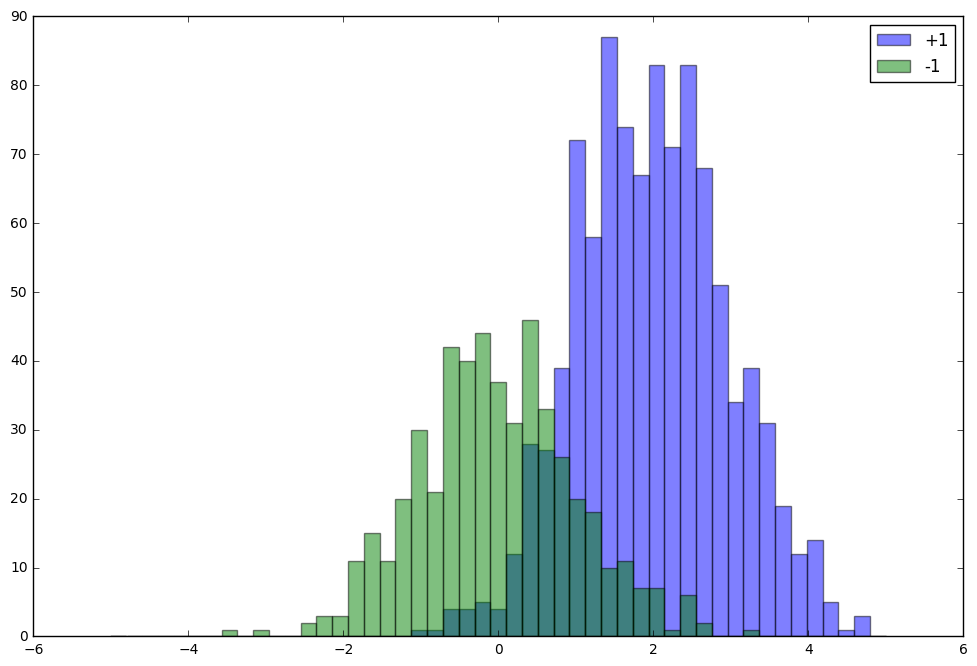

In [21]:
plt.figure(figsize=(12,8))
bins = np.linspace(-5,5,50)
hp, b1, p1 = plt.hist(xps, bins=bins, alpha=0.5, label='+1')
hm, b2, p2 = plt.hist(xms, bins=bins, alpha=0.5, label ='-1')
plt.legend()

1) First plot
$P(+1|x)$ vs $x$

`hp` and `hm` contains histogram value for class +1 and -1.

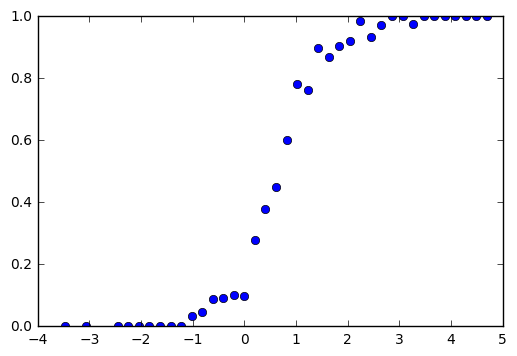

In [9]:
#some helper for you
midpoints = (bins[1:] + bins[:-1])/2.0
prob = [ [m, x1/(x2+x1)] for m, x1, x2 in zip(midpoints, hp, hm) if x1+x2>0 ] # it's a tuple of +1 and -1 value
xs = [p[0] for p in prob] 
ys = [p[1] for p in prob]
plt.plot(xs,ys, "o")

2) Should you use linear regression to predict the probability? Why? If you have time try and see what happens.

In [10]:
# NAH, cos domain range -inf to inf

3) Plot with $s = -5 \ldots 5$

$$\theta(s) = \frac{1}{1+e^{-s}}$$

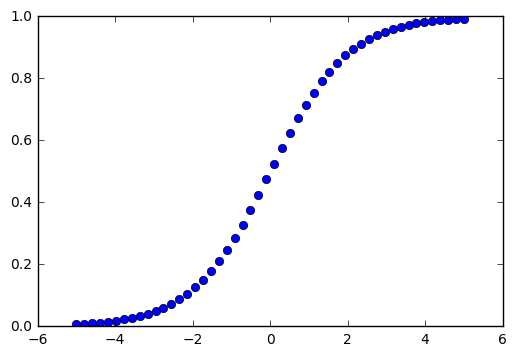

In [35]:
def theta(x):
    return 1. / (1. + np.exp(-x))

x = np.linspace(-5,5,50)
y = [theta(xx) for xx in x]
plt.plot(x,y, "o")

4) Find $\theta(\infty)$ and $\theta(-\infty)$

In [8]:
# thetha inf = 1
# thetha -inf = 0

5) Show that

$$1-\theta(s) = \theta(-s)$$

In [ ]:
# on my phone

6) How should we compte $s$ from the features ?

7) Given that you use hypothesis $$ P_\vec{w}(1 | \vec{x}) = \theta(\vec{w}\cdot\vec{x}) $$
and that you only 2 classes (+1 and -1) what is

$$ P_\vec{w}(-1 | \vec{x})$$

$ 1 -  \theta(\vec{w}\cdot\vec{x}) $

8) What parameter parametrize your hypothesis?

 $ \vec{w}\ $

9) Use the fact from 5) write what you found in 7 in a simpler form

$$
P_\vec{w}(y|\vec{x}) = \begin{cases}
    \ldots & y = 1 \\
    \ldots & y = -1
\end{cases}
$$

<span style="color:red">
$$
P_\vec{w}(y|\vec{x}) = \begin{cases}
    \theta(\vec{w}\cdot\vec{x}) & y = 1 \\
    1 - \theta(\vec{w}\cdot\vec{x}) & y = -1
\end{cases}
$$
</span>

<span style="color:red">
$$
P_\vec{w}(y|\vec{x}) = \begin{cases}
    \theta(\vec{w}\cdot\vec{x}) & y = 1 \\
    \theta(\vec{-w}\cdot\vec{x}) & y = -1
\end{cases}
$$
</span>

10) Use the fact that $y\in\{-1, 1\}$ and convince yourself that what you wrote above is just

$$ P_\vec{w}\left(y|\vec{x} \right) = \theta\left(y \times \left( \vec{w} \cdot \vec{x} \right) \right)$$

In [ ]:
# sure 

11) How do we distinguish a good hypothesis from bad hypothesis? (good $\vec{w}$ from bad $\vec{w}$)

In [ ]:
# Good hy -> High prob getting data points we already have
# Bad hy  -> low prob getting data points that we want 

12) What does likelihood represents?

In [ ]:
# a w which is close to your data points has a high likelihood

13) Let us do one concrete example here.  Calculate the likelihood for $\vec{w}$ given these data point
$$\vec{w}_1 = (1,2,3)$$
- $y = 1$, $x=[1, -1]$
- $y = -1$, $x=[-2, 1]$ 

Don't forget to pad your feature.

In [12]:
x1 = [1,1,-1]
x2 = [1,-2,1]
w = [1,2,3]
y1 = 1
y2 = -1
p1 = theta(y1 * np.dot(w, x1))
p2 = theta(y2 * np.dot(w, x2))
print "x1 ", p1
print "x2 ", p2
print p1 * p2

x1  0.5
x2  0.5
0.25


14) Is $\vec{w}_2 = (1,1,1)$ a better hypothesis?

In [14]:
x1 = [1,1,-1]
x2 = [1,-2,1]
w = [1,1,1]
y1 = 1
y2 = -1
p1 = theta(y1 * np.dot(w, x1))
p2 = theta(y2 * np.dot(w, x2))
print "x1 ", p1
print "x2 ", p2
print p1 * p2

print "yes because higher prob"

x1  0.73105857863
x2  0.5
0.365529289315
yes because higher prob


15) What happen when we take log of the likelihood? Write down log likehood in terms of feature, weight and classes.

In [ ]:
# for computer precision problem

16) Does greater log likelihood indicate a better hypothesis? Or is it the other way around.

In [ ]:
# yes it does

17) Write down our cost function. Do we want to maximize or minimize the cost function?

In [ ]:
# minimize the cost function



18) Turn what you found in 17 to minization problem.

19) Minimize it and try to debug it. You will most likely run into a bunch of numerical problems.

Hint: computer doesn't like '$e^x$ when $x$ is large. You may find numpy.clip useful

Hint: `log` function is typically inaccurate when the argument is near 1. Use `log1p` when you want to calculate `log(1+x)` for greater accuracy.

Optimization terminated successfully.
         Current function value: 475.996047
         Iterations: 44
         Function evaluations: 84
[-1.39002017  2.11646711]


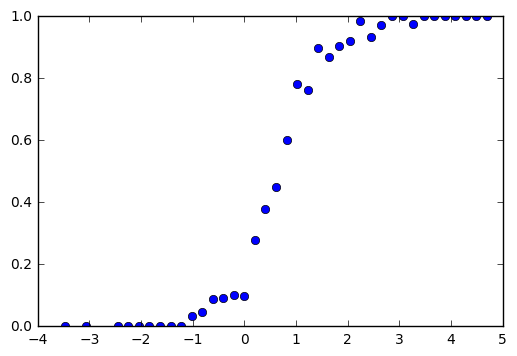

In [45]:
from scipy.optimize import fmin

def theta2(x):
    x = np.clip(x, -200, 200, out =x)
    return 1. / (1. + np.exp(-x))

def pad(x):
    l = len(x)
    tmp = np.empty((l,2))
    tmp[:,0] = 1
    tmp[:,1] = x
    return tmp


def cost(w):
    padx = pad(xps)
    padxx = pad(xms)
    costx = np.sum(np.log(theta2(np.dot(padx, w)))) 
    costxx = np.sum(np.log(theta2(-1 *np.dot(padxx, w)))) # -1 because the y = -1
    return -(costx + costxx)

res = fmin(cost, [1.,1.])
print res

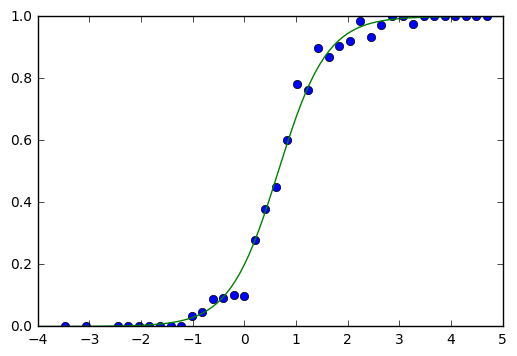

In [51]:
midpoints = (bins[1:] + bins[:-1])/2.0
prob = [ [m, x1/(x2+x1)] for m, x1, x2 in zip(midpoints, hp, hm) if x1+x2>0 ] # it's a tuple of +1 and -1 value
xs = [p[0] for p in prob] 
ys = [p[1] for p in prob]
plt.plot(xs,ys, "o")

def prob(x):
    return theta(np.dot([1,x], res))

linex = np.linspace(-4,5, 100)
liney = [prob(x) for x in linex] # if it doesnt work then fix it
plt.plot(linex,liney)

20) Once you are done. Compare you hypothesis with the probability getting from data.

# ROC Curve (receiver operating characteristic)

Let us consider a fingerprint application to authenticate people through super secret stuff. So the class +1 means authenticate and -1 means denied entry.

1) What is True Positive?

In [ ]:
# It's true and model predicts true

2) What is False Positive?

In [ ]:
# It's false and model predicts true

3) What is True Negative?

In [ ]:
# It's false and model predicts false

4) What is False Negative?

In [ ]:
# It's true and model predicts false

5) Which of the above number you want to be high and which of the above number you want to be low?

In [ ]:
# Anything true you want it to be high

6) Where would you place a cut on classifier output to make True Positive rate really high? What 's wrong with that?

In [ ]:
# high threshold is stricter so less people get in , including the correct one 
# so you but the cut low, but other people could get in easier 

7) Where would you place a cut on classifier output to make True Negative rate really high? What 's wrong with that?

In [ ]:
# high threshold 

8) If we place a cut at 0.3. What are the numbers for "True positive sample", "True negative sample", "False postive samples", "False negative samples"

Write a function to do that we need it later.

9) If we place a cut at 0.3. What is "True positive **rate**", "True negative **rate**", "False postive **rate**", "False negative **rate**" 

Write a function to do that. We will need it later.

10) If we place a cut at 0.7. Which of the rate would be higher and which of the rate would be lower? (Reason first, then run the code and see if it matches)

11) Vary the cut and plot True positive rate on y axis and false positive rate on x axis. This curve is called ROC curve.
if you classifier is good which corner it should go?

12) Consider these two fingerprint application and tell relatively where we should place a cut(which one with higher cut?)

A) FBI Door fingerprint.

B) Supermarket membership where use scan finger to verify the membership.